import all libraries for project

In [2]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np

import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Load dataset

In [3]:
from numpy import genfromtxt
open_eyes = genfromtxt('open_eyes.csv', delimiter=',')
close_eyes = genfromtxt('close_eyes.csv', delimiter=',')

Dataset dimentsions

In [4]:
print('open_eyes : ',open_eyes.shape)
print('close_eyes : ',close_eyes.shape)

open_eyes :  (42952, 784)
close_eyes :  (41946, 784)


Reshape images with 28x28 dimension

In [26]:
open_eyes=open_eyes.reshape([len(open_eyes),28,28])
close_eyes=close_eyes.reshape([len(close_eyes),28,28])

Dataset dimentsions

In [27]:
print('open_eyes : ',open_eyes.shape)
print('close_eyes : ',close_eyes.shape)

open_eyes :  (42952, 28, 28, 1)
close_eyes :  (41946, 28, 28, 1)


show open eye image

TypeError: Invalid shape (28, 28, 1) for image data

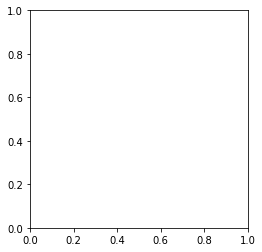

In [28]:
plt.imshow(open_eyes[56])

check close eye image

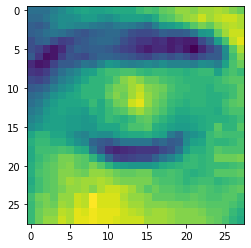

In [8]:
plt.imshow(close_eyes[81])

create train and test data

In [30]:
close_eyes_train_data , close_eyes_test_data = np.split(close_eyes,2)
open_eyes_train_data , open_eyes_test_data = np.split(open_eyes,2)
train_labels = np.append(np.zeros(len(close_eyes_train_data)),np.ones(len(open_eyes_train_data)))
test_labels = np.append(np.zeros(len(close_eyes_test_data)),np.ones(len(open_eyes_test_data)))
train_data = np.append(close_eyes_train_data , open_eyes_train_data)
test_data = np.append(close_eyes_test_data , open_eyes_test_data)
train_data_length = int(len(train_data)/28/28)
test_data_length = int(len(test_data)/28/28)
train_data=train_data.reshape([train_data_length,28,28,1])
test_data=test_data.reshape([test_data_length,28,28,1])
del close_eyes_train_data
del close_eyes_test_data
del open_eyes_train_data
del open_eyes_test_data
print('train_data : ',train_data.shape)
print('test_data : ',test_data.shape)
print('train_labels : ',train_labels.shape)
print('test_labels : ',test_labels.shape)

train_data :  (42449, 28, 28, 1)
test_data :  (42449, 28, 28, 1)
train_labels :  (42449,)
test_labels :  (42449,)


Create tensorflow model

In [45]:
num_classes = 2
model = Sequential([
    layers.Conv2D(32,3,activation='softmax',input_shape=(28,28,1)),
    layers.Conv2D(32,3,activation='softmax'),
    layers.Conv2D(64,3,activation='softmax'),
    layers.Dense(128),
    layers.Flatten(),
    layers.Dense(2)
    
])
model.build()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
dense_28 (Dense)             (None, 22, 22, 128)       8320      
_________________________________________________________________
flatten_14 (Flatten)         (None, 61952)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 123906    
Total params: 160,290
Trainable params: 160,290
Non-trainable params: 0
_______________________________________________

compile mode

In [46]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [48]:
model.fit(train_data, train_labels, epochs=3, 
                    validation_data=(test_data, test_labels))

Epoch 1/3
1327/1327 [==============================] - 167s 126ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.4941
Epoch 2/3
1327/1327 [==============================] - 169s 127ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.4941
Epoch 3/3
1327/1327 [==============================] - 171s 129ms/step - loss: 0.6932 - accuracy: 0.4941 - val_loss: 0.6932 - val_accuracy: 0.4941


Save model in open_close_eyes_model.h5

In [39]:
model.save('open_close_eyes_model.h5')